In [28]:
import math
import operator
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [29]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)
 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    print (testInstance)
    for x in range(len(trainingSet)):
        #print (testInstance,trainingSet[x])
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
 
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]
 
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [46]:
#Getting the important
def get_important_features(data,label,thresh):
    correlation = []
    for col in data.columns:
        row = []
        for col2 in data.columns:
            row.append(pearsonr(data[col],data[col2])[0])
        correlation.append(row)
    return [x[1] for x in sorted(correlation) if x[0]>thresh],correlation
    
def get_important_feature_data(data,important_features):
    important_feature_data = []
    #print important_features
    for index in range(tornado_data.shape[0]):
        row = [data[col][index] for col in important_features]
        important_feature_data.append(row)
    return important_feature_data

In [36]:
storm_df = pd.read_csv('Tornadoes_SPC_1950to2015.csv')
tonadoes_1996 = df[df['yr'] >= 1996][['st','loss','closs']]
print (storm_df['mag'])

0        3
1        3
2        1
3        3
4        2
5        2
6        2
7        2
8        3
9        2
10       2
11       2
12       1
13       2
14       1
15       2
16       1
17       3
18       2
19       4
20       2
21       3
22       2
23       1
24       1
25       2
26       2
27       1
28       2
29       1
        ..
60084    0
60085    0
60086    0
60087    0
60088    0
60089    3
60090    4
60091    0
60092    2
60093    1
60094    1
60095    0
60096    1
60097    1
60098    1
60099    1
60100    1
60101    2
60102    1
60103    1
60104    1
60105    1
60106    1
60107    1
60108    1
60109    1
60110    2
60111    1
60112    1
60113    0
Name: mag, Length: 60114, dtype: int64


In [37]:
#Removing columns with string data and label
#print (tornado_data[0:12])
mag_data = storm_df['mag']
storm_df = storm_df.drop(['st','date','time','mag'],axis=1)
#Getting the labels
#mag_data = storm_df['mag']
storm_df["mag"]=mag_data
print (storm_df[0:12])

    om    yr  mo  dy  tz  stf  stn  inj  fat  loss  closs   slat   slon  \
0    1  1950   1   3   3   29    1    3    0   6.0    0.0  38.77 -90.22   
1    2  1950   1   3   3   17    2    3    0   5.0    0.0  39.10 -89.30   
2    3  1950   1   3   3   39    1    1    0   4.0    0.0  40.88 -84.58   
3    4  1950   1  13   3    5    1    1    1   3.0    0.0  34.40 -94.37   
4    5  1950   1  25   3   29    2    5    0   5.0    0.0  37.60 -90.68   
5    6  1950   1  25   3   17    3    0    0   5.0    0.0  41.17 -87.33   
6    7  1950   1  26   3   48    1    2    0   0.0    0.0  26.88 -98.12   
7    8  1950   2  11   3   48    2    0    0   4.0    0.0  29.42 -95.25   
8    9  1950   2  11   3   48    3   12    1   4.0    0.0  29.67 -95.05   
9   10  1950   2  11   3   48    4    5    0   5.0    0.0  32.35 -95.20   
10  11  1950   2  11   3   48    5    6    0   5.0    0.0  32.98 -94.63   
11  12  1950   2  12   3   48    6    8    1   4.0    0.0  33.33 -94.42   

     elat   elon   len  

In [47]:
names = storm_df.dtypes[(storm_df.dtypes=='int64') | (storm_df.dtypes=='float64')].index
print(names)
tick = np.arange(0,len(names),1)
print(tick)
storm_df.corr()

Index(['om', 'yr', 'mo', 'dy', 'tz', 'stf', 'stn', 'inj', 'fat', 'loss',
       'closs', 'slat', 'slon', 'elat', 'elon', 'len', 'wid', 'fc', 'mag'],
      dtype='object')
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


,om,yr,mo,dy,tz,stf,stn,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,fc,mag
om,1.000000,0.440625,-0.009034,0.056986,-0.004388,-0.021670,-0.174338,-0.004064,0.002236,0.002986,0.017372,0.003994,0.018468,0.267938,-0.271676,0.007244,0.098176,-0.055649,-0.066736
yr,0.440625,1.000000,0.011969,0.025657,0.006949,-0.052393,-0.017689,-0.037734,-0.031706,-0.027902,0.021959,0.016368,0.022514,0.538407,-0.546885,-0.075686,0.072242,-0.221095,-0.309027
mo,-0.009034,0.011969,1.000000,-0.042629,0.002594,0.000992,0.292656,-0.025623,-0.027052,-0.010072,-0.007497,0.043966,0.037097,-0.021293,0.030595,-0.056400,-0.057693,0.019223,-0.050574
dy,0.056986,0.025657,-0.042629,1.000000,-0.001202,0.002549,0.032107,-0.009754,-0.003672,-0.000344,0.005783,-0.000065,-0.004350,0.017425,-0.019283,-0.006369,0.011614,-0.000996,-0.010877
tz,-0.004388,0.006949,0.002594,-0.001202,1.000000,0.012658,-0.009781,-0.001155,-0.000889,-0.001288,-0.000248,0.020861,-0.021750,-0.009674,0.010290,-0.000657,-0.002896,-0.002537,-0.007434
stf,-0.021670,-0.052393,0.000992,0.002549,0.012658,1.000000,0.209450,-0.015333,-0.012574,-0.011903,-0.002569,0.089514,-0.132844,-0.038397,0.044652,-0.039258,-0.019945,0.007176,-0.022188
stn,-0.174338,-0.017689,0.292656,0.032107,-0.009781,0.209450,1.000000,-0.016975,-0.009571,-0.005035,-0.007628,-0.267270,-0.171904,-0.094884,0.053787,-0.058978,-0.047451,0.010039,-0.081774
inj,-0.004064,-0.037734,-0.025623,-0.009754,-0.001155,-0.015333,-0.016975,1.000000,0.760394,0.396318,0.031558,-0.011022,0.034252,0.050842,-0.047573,0.252200,0.198564,-0.013839,0.223765
fat,0.002236,-0.031706,-0.027052,-0.003672,-0.000889,-0.012574,-0.009571,0.760394,1.000000,0.452261,0.033671,-0.010680,0.023290,0.043271,-0.041803,0.230123,0.183429,-0.010831,0.197807
loss,0.002986,-0.027902,-0.010072,-0.000344,-0.001288,-0.011903,-0.005035,0.396318,0.452261,1.000000,0.069435,-0.009378,0.023814,-0.006686,0.007353,0.113120,0.145159,-0.004930,0.122979


In [50]:
important_features,correlation = get_important_features(tornado_data,mag_data,thresh=0.1)
correlation_df = pd.DataFrame(correlation,index=names,columns=names)
correlation_df

,om,yr,mo,dy,tz,stf,stn,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,fc,mag
om,1.000000,0.440625,-0.009034,0.056986,-0.004388,-0.021670,-0.174338,-0.004064,0.002236,0.002986,0.017372,0.003994,0.018468,0.267938,-0.271676,0.007244,0.098176,-0.055649,-0.066736
yr,0.440625,1.000000,0.011969,0.025657,0.006949,-0.052393,-0.017689,-0.037734,-0.031706,-0.027902,0.021959,0.016368,0.022514,0.538407,-0.546885,-0.075686,0.072242,-0.221095,-0.309027
mo,-0.009034,0.011969,1.000000,-0.042629,0.002594,0.000992,0.292656,-0.025623,-0.027052,-0.010072,-0.007497,0.043966,0.037097,-0.021293,0.030595,-0.056400,-0.057693,0.019223,-0.050574
dy,0.056986,0.025657,-0.042629,1.000000,-0.001202,0.002549,0.032107,-0.009754,-0.003672,-0.000344,0.005783,-0.000065,-0.004350,0.017425,-0.019283,-0.006369,0.011614,-0.000996,-0.010877
tz,-0.004388,0.006949,0.002594,-0.001202,1.000000,0.012658,-0.009781,-0.001155,-0.000889,-0.001288,-0.000248,0.020861,-0.021750,-0.009674,0.010290,-0.000657,-0.002896,-0.002537,-0.007434
stf,-0.021670,-0.052393,0.000992,0.002549,0.012658,1.000000,0.209450,-0.015333,-0.012574,-0.011903,-0.002569,0.089514,-0.132844,-0.038397,0.044652,-0.039258,-0.019945,0.007176,-0.022188
stn,-0.174338,-0.017689,0.292656,0.032107,-0.009781,0.209450,1.000000,-0.016975,-0.009571,-0.005035,-0.007628,-0.267270,-0.171904,-0.094884,0.053787,-0.058978,-0.047451,0.010039,-0.081774
inj,-0.004064,-0.037734,-0.025623,-0.009754,-0.001155,-0.015333,-0.016975,1.000000,0.760394,0.396318,0.031558,-0.011022,0.034252,0.050842,-0.047573,0.252200,0.198564,-0.013839,0.223765
fat,0.002236,-0.031706,-0.027052,-0.003672,-0.000889,-0.012574,-0.009571,0.760394,1.000000,0.452261,0.033671,-0.010680,0.023290,0.043271,-0.041803,0.230123,0.183429,-0.010831,0.197807
loss,0.002986,-0.027902,-0.010072,-0.000344,-0.001288,-0.011903,-0.005035,0.396318,0.452261,1.000000,0.069435,-0.009378,0.023814,-0.006686,0.007353,0.113120,0.145159,-0.004930,0.122979


In [18]:
important_feature_data = get_important_feature_data(tornado_data,important_features)
important_feature_data[0:12]

[[6.0, -90.219999999999999, 0, 3, 150, 9.5, 3],
 [5.0, -89.299999999999997, 0, 3, 130, 3.6000000000000001, 3],
 [4.0, -84.579999999999998, 0, 1, 10, 0.10000000000000001, 1],
 [3.0, -94.370000000000005, 1, 1, 17, 0.59999999999999998, 3],
 [5.0, -90.680000000000007, 0, 5, 300, 2.2999999999999998, 2],
 [5.0, -87.329999999999998, 0, 0, 100, 0.10000000000000001, 2],
 [0.0, -98.120000000000005, 0, 2, 133, 4.7000000000000002, 2],
 [4.0, -95.25, 0, 0, 400, 9.9000000000000004, 2],
 [4.0, -95.049999999999997, 1, 12, 1000, 12.0, 3],
 [5.0, -95.200000000000003, 0, 5, 100, 4.5999999999999996, 2],
 [5.0, -94.629999999999995, 0, 6, 67, 4.5, 2],
 [4.0, -94.420000000000002, 1, 8, 833, 8.0, 2]]

In [11]:
predictions = []
num_rows = mag_data.shape[0]
#print (mag_data.shape)
k = 5
for x in range(1000):
    #print (mag_data[x])
    neighbours = getNeighbors(important_feature_data[0:10000],important_feature_data[10000+x] , k)
    #print (neighbours)
    result = getResponse(neighbours)
    #print (result)
    predictions.append(result)
#print (type(predictions))
print (type(mag_data[10000:11000]))
mag = list (mag_data[10000:11000])
#mag = np.array(mag_data[10:12])
print(type(mag))
accuracy = getAccuracy(mag,predictions)
print (accuracy)

[0.0, -100.52, 0, 0, 17, 0.10000000000000001, 2]
[4.0, -76.579999999999998, 0, 5, 50, 2.0, 3]
[2.0, -102.84999999999999, 0, 0, 10, 0.10000000000000001, 1]
[0.0, -88.980000000000004, 0, 0, 10, 11.4, 1]
[4.0, -90.0, 0, 0, 10, 0.10000000000000001, 1]
[0.0, -89.719999999999999, 0, 0, 10, 0.10000000000000001, 0]
[4.0, -99.620000000000005, 0, 0, 10, 0.10000000000000001, 0]
[0.0, -94.579999999999998, 0, 0, 33, 0.20000000000000001, 0]
[0.0, -98.5, 0, 0, 10, 0.10000000000000001, 0]
[4.0, -84.25, 0, 0, 30, 2.0, 2]
[4.0, -81.629999999999995, 0, 0, 33, 0.5, 2]
[0.0, -97.700000000000003, 0, 0, 10, 0.10000000000000001, 0]
[0.0, -98.75, 0, 0, 10, 0.10000000000000001, 0]
[0.0, -97.599999999999994, 0, 0, 10, 0.10000000000000001, 0]
[0.0, -97.620000000000005, 0, 0, 10, 0.10000000000000001, 0]
[0.0, -98.079999999999998, 0, 0, 10, 0.10000000000000001, 0]
[0.0, -98.700000000000003, 0, 0, 10, 0.10000000000000001, 0]
[4.0, -97.799999999999997, 0, 0, 10, 0.10000000000000001, 1]
[0.0, -97.819999999999993, 0, 0

[0.0, -97.280000000000001, 0, 0, 10, 0.10000000000000001, 0]
[4.0, -97.879999999999995, 0, 0, 10, 0.10000000000000001, 1]
[4.0, -96.579999999999998, 0, 1, 10, 0.10000000000000001, 1]
[2.0, -97.920000000000002, 0, 0, 10, 0.10000000000000001, 1]
[1.0, -97.799999999999997, 0, 0, 10, 0.10000000000000001, 0]
[2.0, -97.799999999999997, 0, 0, 10, 0.10000000000000001, 1]
[0.0, -97.319999999999993, 0, 0, 10, 7.7000000000000002, 1]
[3.0, -97.319999999999993, 0, 0, 10, 0.10000000000000001, 1]
[6.0, -97.069999999999993, 0, 4, 333, 4.2999999999999998, 3]
[0.0, -99.230000000000004, 0, 0, 10, 0.10000000000000001, 0]
[5.0, -97.420000000000002, 0, 1, 10, 0.10000000000000001, 1]
[3.0, -98.069999999999993, 0, 0, 10, 0.10000000000000001, 1]
[0.0, -94.829999999999998, 0, 0, 10, 0.10000000000000001, 0]
[5.0, -98.120000000000005, 0, 0, 67, 5.0, 3]
[0.0, -97.950000000000003, 0, 0, 10, 0.10000000000000001, 0]
[4.0, -96.849999999999994, 0, 3, 167, 2.0, 3]
[0.0, -97.519999999999996, 0, 0, 10, 0.10000000000000001

[4.0, -86.219999999999999, 0, 0, 10, 1.0, 1]
[4.0, -87.700000000000003, 0, 0, 10, 0.10000000000000001, 1]
[0.0, -88.079999999999998, 0, 0, 10, 12.1, 2]
[0.0, -87.719999999999999, 0, 0, 10, 0.10000000000000001, 2]
[4.0, -87.150000000000006, 0, 0, 10, 0.10000000000000001, 1]
[4.0, -87.519999999999996, 0, 0, 10, 0.10000000000000001, 2]
[5.0, -86.170000000000002, 0, 0, 10, 0.10000000000000001, 1]
[3.0, -85.700000000000003, 0, 0, 10, 0.10000000000000001, 2]
[5.0, -159.66999999999999, 0, 0, 70, 2.5, 1]
[4.0, -88.969999999999999, 0, 0, 100, 0.29999999999999999, 0]
[6.0, -86.700000000000003, 2, 27, 300, 22.899999999999999, 2]
[4.0, -88.150000000000006, 0, 0, 10, 7.5999999999999996, 3]
[4.0, -85.200000000000003, 0, 2, 27, 3.2999999999999998, 2]
[4.0, -86.799999999999997, 0, 0, 10, 2.0, 2]
[4.0, -111.81999999999999, 0, 0, 33, 0.29999999999999999, 1]
[3.0, -90.280000000000001, 0, 0, 100, 0.5, 2]
[4.0, -92.069999999999993, 0, 2, 150, 12.300000000000001, 2]
[4.0, -92.450000000000003, 0, 0, 50, 6.40

[0.0, -97.420000000000002, 0, 0, 20, 0.29999999999999999, 1]
[0.0, -99.079999999999998, 0, 0, 10, 0.10000000000000001, 0]
[5.0, -97.400000000000006, 0, 1, 17, 0.10000000000000001, 2]
[4.0, -95.349999999999994, 0, 1, 67, 3.2999999999999998, 1]
[5.0, -84.599999999999994, 0, 1, 200, 9.3000000000000007, 1]
[7.0, -84.370000000000005, 6, 364, 550, 78.700000000000003, 4]
[6.0, -85.480000000000004, 0, 11, 100, 60.899999999999999, 3]
[6.0, -84.269999999999996, 1, 33, 300, 24.100000000000001, 4]
[4.0, -84.299999999999997, 0, 0, 100, 0.10000000000000001, 1]
[1.0, -84.0, 0, 0, 10, 0.10000000000000001, 2]
[4.0, -83.420000000000002, 0, 1, 20, 0.10000000000000001, 0]
[5.0, -82.719999999999999, 0, 0, 200, 8.1999999999999993, 1]
[5.0, -82.870000000000005, 0, 1, 100, 4.9000000000000004, 2]
[6.0, -82.950000000000003, 0, 5, 10, 0.10000000000000001, 3]
[5.0, -85.819999999999993, 0, 1, 10, 0.10000000000000001, 1]
[6.0, -82.799999999999997, 7, 93, 400, 34.0, 5]
[3.0, -92.349999999999994, 0, 0, 67, 1.0, 2]
[5

[4.0, -86.230000000000004, 0, 0, 10, 0.10000000000000001, 2]
[0.0, -87.129999999999995, 0, 0, 10, 0.10000000000000001, 1]
[3.0, -83.769999999999996, 0, 0, 17, 0.20000000000000001, 1]
[3.0, -87.469999999999999, 0, 0, 10, 0.10000000000000001, 1]
[4.0, -88.450000000000003, 0, 0, 100, 1.0, 0]
[4.0, -83.200000000000003, 0, 0, 37, 2.0, 1]
[3.0, -83.200000000000003, 0, 0, 33, 0.90000000000000002, 1]
[0.0, -80.599999999999994, 0, 0, 10, 0.10000000000000001, 0]
[3.0, -95.680000000000007, 0, 0, 10, 0.10000000000000001, 1]
[5.0, -87.430000000000007, 0, 0, 10, 2.0, 2]
[0.0, -80.670000000000002, 0, 0, 10, 0.10000000000000001, 0]
[4.0, -85.099999999999994, 0, 0, 33, 0.80000000000000004, 2]
[0.0, -98.370000000000005, 0, 0, 10, 0.10000000000000001, 0]
[0.0, -99.599999999999994, 0, 0, 17, 0.5, 0]
[0.0, -102.38, 0, 0, 67, 1.0, 0]
[0.0, -102.38, 0, 0, 17, 0.20000000000000001, 0]
[0.0, -101.38, 0, 0, 23, 0.10000000000000001, 0]
[6.0, -101.92, 0, 0, 3000, 5.0, 2]
[0.0, -101.78, 0, 0, 33, 0.1000000000000000

[5.0, -91.780000000000001, 0, 2, 300, 39.0, 2]
[2.0, -97.599999999999994, 0, 0, 50, 2.0, 2]
[4.0, -69.769999999999996, 0, 0, 33, 2.2999999999999998, 1]
[3.0, -68.900000000000006, 0, 2, 27, 0.29999999999999999, 1]
[5.0, -70.799999999999997, 0, 1, 100, 0.29999999999999999, 1]
[4.0, -80.700000000000003, 0, 0, 10, 0.10000000000000001, 1]
[3.0, -82.420000000000002, 0, 0, 400, 0.80000000000000004, 1]
[3.0, -105.15000000000001, 0, 0, 17, 0.10000000000000001, 0]
[0.0, -94.730000000000004, 0, 0, 10, 0.10000000000000001, 0]
[4.0, -111.75, 0, 2, 33, 0.10000000000000001, 2]
[1.0, -84.299999999999997, 0, 0, 10, 0.10000000000000001, 0]
[4.0, -101.27, 0, 0, 30, 0.5, 1]
[0.0, -96.719999999999999, 0, 0, 60, 1.2, 0]
[4.0, -80.599999999999994, 0, 1, 10, 0.10000000000000001, 1]
[1.0, -92.25, 0, 0, 50, 0.29999999999999999, 0]
[1.0, -80.200000000000003, 0, 0, 10, 0.10000000000000001, 0]
[3.0, -102.53, 0, 0, 10, 0.10000000000000001, 0]
[5.0, -77.049999999999997, 0, 0, 10, 0.10000000000000001, 1]
[0.0, -96.59

[3.0, -97.400000000000006, 0, 0, 17, 2.0, 1]
[0.0, -102.42, 0, 0, 10, 0.10000000000000001, 0]
[3.0, -97.829999999999998, 0, 0, 17, 0.20000000000000001, 0]
[0.0, -100.81999999999999, 0, 0, 13, 0.10000000000000001, 0]
[0.0, -102.83, 0, 0, 200, 1.0, 1]
[3.0, -100.83, 0, 0, 17, 0.10000000000000001, 0]
[0.0, -122.03, 0, 0, 13, 0.10000000000000001, 0]
[0.0, -98.599999999999994, 0, 0, 10, 0.10000000000000001, 0]
[4.0, -80.099999999999994, 0, 0, 10, 0.10000000000000001, 1]
[4.0, -82.549999999999997, 0, 0, 50, 0.10000000000000001, 2]
[3.0, -97.5, 0, 0, 17, 1.0, 1]
[0.0, -110.93000000000001, 0, 0, 10, 0.10000000000000001, 0]
[0.0, -101.83, 0, 0, 17, 0.10000000000000001, 0]
[0.0, -89.079999999999998, 0, 5, 123, 2.0, 3]
[4.0, -89.650000000000006, 0, 3, 180, 43.5, 2]
[0.0, -89.370000000000005, 0, 5, 50, 2.0, 2]
[5.0, -88.120000000000005, 0, 18, 400, 70.400000000000006, 3]
[4.0, -79.769999999999996, 0, 0, 40, 0.80000000000000004, 1]
[5.0, -97.0, 0, 2, 200, 14.4, 3]
[5.0, -95.200000000000003, 0, 0, 1

In [ ]:
for x in range(10):
    print (x)

In [26]:
type(df.corr())

pandas.core.frame.DataFrame

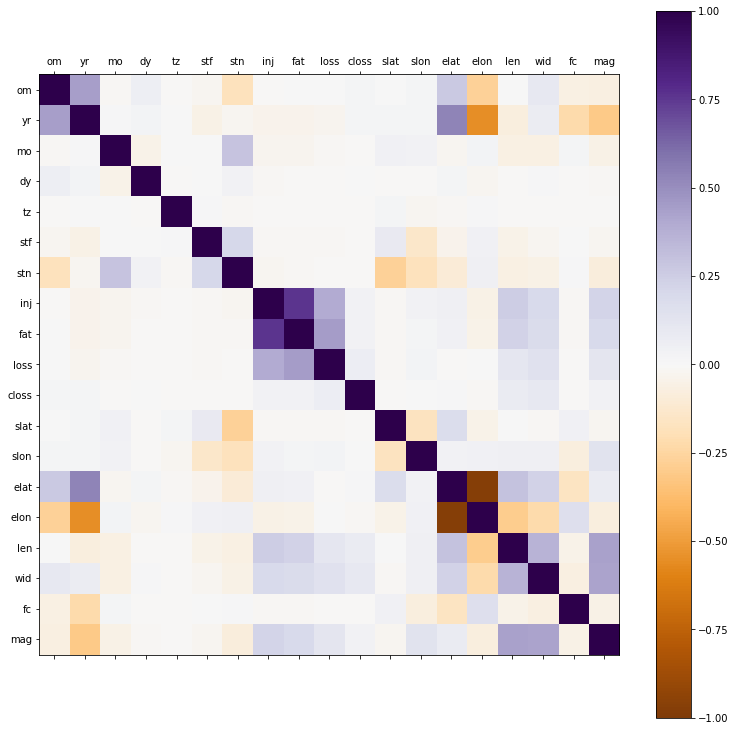

In [51]:
fig = plt.figure(figsize=(13,13))
ax1 = fig.add_subplot(111)
plt1 = ax1.matshow(correlation_df, vmin=-1, vmax=1, cmap=plt.get_cmap('PuOr'))
fig.colorbar(plt1)
ax1.set_xticks(tick)
ax1.set_xticklabels(names)
ax1.set_yticks(tick)
ax1.set_yticklabels(names)
plt.show()